Unit 1, Sprint 2, Module 1

###Learning Objectives:
- Student can create a scatterplot
- Student can identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- Student can identify linear and nonlinear relationships from a scatterplot
- Student can calculate and interpret linear correlation
- Student can calculate and interpret the slope and intercept of a simple linear regression model
- Sudent can predict a response from a simple linear regression model
- Student can calculate and interpret a residual

#Use the following information to answer questions 1 - 13 in the assignment:



###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [6]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in g
- Head, the head size in cubic cm

1) If we wish to predict brain weight from head size, which variable is the independent variable (also called the feature, explanatory or x variable) and which variable is the dependent variable (also called the target, response or y variable)?

Answer here: -->

As the question suggest that we like to predict brain weight **from** head size. The head size is going to be a x variable or independent variable while the brain weight will be the y variable or the dependent variable.

2) Draw a scatterplot showing the relationship between brain weight and head size.  Make sure to graph the correct variable on the correct axis and label your graph.

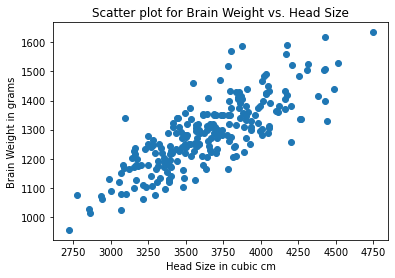

In [5]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

plt.scatter(x = df['Head'], y = df['Brain'])
plt.xlabel('Head Size in cubic cm')
plt.ylabel('Brain Weight in grams')   # ??? ask question about these in the after hours compared to fig, ax = plt.subplots() ax.set_title('Long Bone Nitrogen Composition and Interment Time')
plt.title('Scatter plot for Brain Weight vs. Head Size');


3) Describe the strength and direction of the relationship between head size and brain weight.

Answer here: -->

The strength and direction relationship between head size and brain weight can be obtained by linear corelation. 

4) Determine if there is any missing data in the dataset.

In [7]:
### YOUR CODE HERE ###
df.isnull().sum()
# df.shape 

Gender    0
Age       0
Head      0
Brain     0
dtype: int64

Answer here: -->

The data is complete and there is no missing information in the 237 rows and 4 columns.

5) Calculate and interpret the correlation coefficient for the relationship between head size and brain weight.  

In [12]:
### YOUR CODE HERE ###
r = np.corrcoef(df['Head'], df['Brain'])

print ('The correlation coefficient for head  size and brain weight is:', r[0][1])

The correlation coefficient for head  size and brain weight is: 0.7995697092542962


Answer here: -->

The correlation coefficient for the relationship between head size and brain weight is 0.80 which denotes that there is a strong **positive** correlation between the two.

6) Without doing any other calculations, determine the correlation of brain weight with head size.

Answer here: -->

The correlation of brain weight and head size is the same as the one shown above. The correlation coefficient is **bi directional** i.e. you get the same result if you invert the inputs in the formula.


7) Use Python to calculate the slope and intercept terms for the model of head size and brain weight.

In [13]:
### YOUR CODE HERE ###

from statsmodels.formula.api import ols

# Entering the model in Y ~ X format

model = ols('Brain ~ Head', data = df).fit()
model.params

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept    325.573421
Head           0.263429
dtype: float64

8) Use the model output above to write the linear model relating head size to brain weight (ie fill in the b terms with the correct numbers from above).

$$\hat{Y} = b_0 - b_1X$$



Answer here: -->

$$\hat{Y} = 325.573421 + 0.263429X$$

9) What does the slope term tell us about the relationship between head size and brain weight?

Answer here: -->

The slope or b1 being a positive value tells us that there is a positive linear correlation relationship between brain weight and head size. This validates the information we got above during correlation.
In other words for every 1 cubic cm increase in head size the brain weight increases by 0.263429 only. 

10) What does the intercept tell us about the relationship between head size and brain weight?

Answer here: -->

The intercept is something that we will have to ignore for this particular model as there is no 0 value of head size. Or you cannot say that for a 0 cubic cm of head size the brain weight is going to be 325.57 grams which will not make any sense.

11) Draw a scatterplot with the regression line overlayed on top of the points.

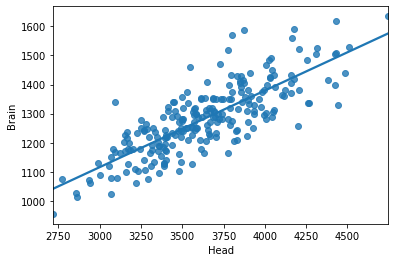

In [14]:
### YOUR CODE HERE ###
import seaborn as sns

# Using none as the CI interval
ax = sns.regplot(x = 'Head', y = 'Brain', data = df, ci = None)

12) A healty human has a brain size of 4100 cubic cm, how much do we expect his or her brain to weigh?

In [15]:
### YOUR CODE HERE ###
x = 4100

# getting the data from the slope and intercept calculated above
intercept, slope = model.params
predict_brain_weight = intercept + (slope * x)
predict_brain_weight


1405.6337129559786

Answer here --> 

From the calculations above for 4100 cubic cm of brain size we predict the brain weight to be 1405 grams.

13) Calculate and interpret the model residual for for the first observation in the dataset (head size = 4512 cubic cm).

In [ ]:
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [43]:
### YOUR CODE HERE ###
observed_brain_weight = 1530

residual = observed_brain_weight - predict_brain_weight
print ('For 4100 cubic cm we observed the brain weight is {:.2f} and the predicted brain weight is {:.2f}. \
 Therefore the residual value is {:.2f}'.format(observed_brain_weight,predict_brain_weight,residual))

For 4100 cubic cm we observed the brain weight is 1530.00 and the predicted brain weight is 1405.63.  Therefore the residual value is 124.37


Answer here:-->

From the residual calculation we can say that we have underestimated the brain weight as determined by predictions from our model.



#Use the following information to answer questions 14 - 16 in the assignment:



Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [20]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


14) Write a function that replaces the _ in each animal name with a space.  Eg. Asian_elephant = Asian elephant.  Hint: use the string.replace(old, new, count) function.

In [21]:
### YOUR CODE HERE ###
def replace_(str):
  return str.replace('_', ' ')

sleep['Animal'] = sleep['Animal'].apply(replace_)
sleep.head()


,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big brown bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


15) Plot the relationship between life expectancy and total sleep and gestation time and total sleep.

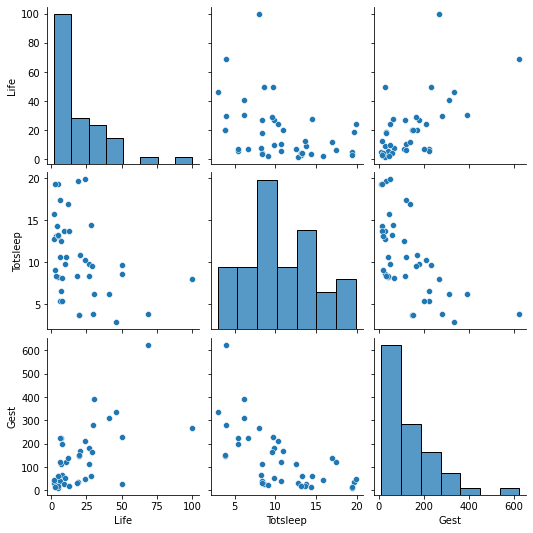

In [22]:
### YOUR CODE HERE ###
to_plot = sleep[['Life', 'Totsleep', 'Gest']]
sns.pairplot(to_plot)

16) Calculate the correlation between life expectancy and total sleep and between gestation time and total sleep.

In [23]:
### YOUR CODE HERE ###
r1 = np.corrcoef(x = sleep['Life'], y = sleep['Totsleep'])
r2 = np.corrcoef(x = sleep['Gest'], y = sleep['Totsleep'])

print ('Correlation between life expectancy and total sleep=', r1[0][1])
print ('Correlation between gestational time and total sleep=', r2[0][1])

Correlation between life expectancy and total sleep= -0.3824461769490717
Correlation between gestational time and total sleep= -0.6144743061371066


#Portfolio Project Assignment.

We're coming into the home stretch!  Finalize your project results.  Ask any lingering questions, and complete any revisions you have.  This would be a good time to have a classmate take a look at your project and point out anything missing or any obvious errors (they happen to everyone!).